In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [128]:
file_path = 'result.csv'
df = pd.read_csv(file_path)

In [134]:
df

,Unnamed: 0,pred_Trend,Date,Marketcap,Trend,portfolio,sell_buy,buy_and_hold,cum_max,drawdown
0,0,-1.021823,2016-03-28,2.033797e+13,-0.873016,1.000000e+06,1,1.000000e+06,1.000000e+06,0.000000
1,1,-0.866249,2016-03-29,2.109611e+13,-0.841270,1.022366e+06,0,1.037277e+06,1.022366e+06,0.000000
2,2,0.528971,2016-03-30,2.099723e+13,-0.809524,1.019449e+06,-1,1.032415e+06,1.022366e+06,0.002854
3,3,2.174911,2016-03-31,2.099723e+13,-0.777778,1.019449e+06,0,1.032415e+06,1.022366e+06,0.002854
4,4,-0.866210,2016-04-01,2.070056e+13,-0.746032,1.019449e+06,1,1.017828e+06,1.022366e+06,0.002854
...,...,...,...,...,...,...,...,...,...,...
1421,1421,12.636087,2022-01-05,5.823743e+13,0.000000,2.417222e+06,-1,2.863482e+06,2.597498e+06,0.069404
1422,1422,-7.600556,2022-01-06,5.553062e+13,0.000000,2.417222e+06,1,2.730391e+06,2.597498e+06,0.069404
1423,1423,12.645076,2022-01-07,5.544859e+13,0.000000,2.415079e+06,-1,2.726358e+06,2.597498e+06,0.070229
1424,1424,-7.573018,2022-01-10,5.495644e+13,0.000000,2.415079e+06,1,2.702159e+06,2.597498e+06,0.070229


In [130]:
df['cum_max'] = df['portfolio'].cummax()

# 낙폭 계산
df['drawdown'] = (df['cum_max'] - df['portfolio']) / df['cum_max']

# 최대 낙폭 (MDD) 계산
mdd = df['drawdown'].max()

In [192]:
def UT(df):
    df['cum_max'] = df['portfolio'].cummax()
    # 낙폭 계산
    df['drawdown'] = (df['cum_max'] - df['portfolio']) / df['cum_max']
    # 최대 낙폭 (MDD) 계산
    mdd = df['drawdown'].max()
    
    bh = df['buy_and_hold'].iloc[-1]
    port = df['portfolio'].iloc[-1]
    dif = port-bh
    percen = (dif / bh) *100
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Date'] = pd.to_datetime(df['Date'])
    
    plt.figure(figsize=(8,8))
    
    # 년도 컬럼 추가
    df['Year'] = df['Date'].dt.year
    plt.subplot(3,1,1)
    # 그래프 그리기
    plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
    plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.title('Portfolio vs BuyandHold')
    plt.legend()

    # x 축 눈금 간격 조정
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

    # 날짜 형식 변경
    date_format = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_format)

    plt.savefig('_1.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Date'] = pd.to_datetime(df['Date'])

    # 년도 컬럼 추가
    df['Year'] = df['Date'].dt.year
    
    plt.figure(figsize=(8,8))
    plt.subplot(3,1,2) 
    # 그래프 그리기
    plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
    plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')

    plt.scatter(df['Date'][df['sell_buy'] == 1], df['portfolio'][df['sell_buy'] == 1], marker='^', color='red', label='Buy')
    plt.scatter(df['Date'][df['sell_buy'] == -1], df['portfolio'][df['sell_buy'] == -1], marker='v', color='blue', label='Sell')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.title('Portfolio vs BuyandHold')
    plt.legend()

    # x 축 눈금 간격 조정
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

    # 날짜 형식 변경
    date_format = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_format)

    plt.savefig('_2.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Date'] = pd.to_datetime(df['Date'])

    # 년도 컬럼 추가
    df['Year'] = df['Date'].dt.year
    plt.figure(figsize=(8,8))
    plt.subplot(3,1,3) 
    # 그래프 그리기
    plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
    plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')

    plt.scatter(df['Date'][df['sell_buy'] == 1], df['portfolio'][df['sell_buy'] == 1], marker='^', color='red', label='Buy')
    plt.scatter(df['Date'][df['sell_buy'] == -1], df['portfolio'][df['sell_buy'] == -1], marker='v', color='blue', label='Sell')
    plt.xlabel('Date')
    plt.ylabel('Equity')
    plt.title('Portfolio vs BuyandHold')
    plt.legend()

    # x 축 눈금 간격 조정
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

    # 날짜 형식 변경
    date_format = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_format)

    # 확대 기능 추가 (원하는 날짜 범위로 설정)
    plt.xlim(pd.Timestamp('2018-10-01'), pd.Timestamp('2019-01-01'))  # x 축 범위 설정
    plt.ylim(0.8e6, 2.0e6)

    plt.savefig('_3.png', dpi=300, bbox_inches='tight') 
    plt.show()
    
    print("MDD(%): ", mdd)
    print("Buy and Hold 대비 return(%): ", percen)

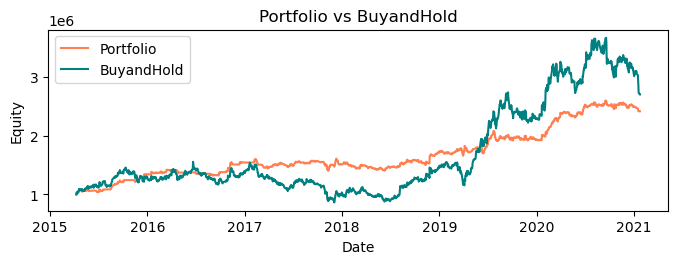

<Figure size 640x480 with 0 Axes>

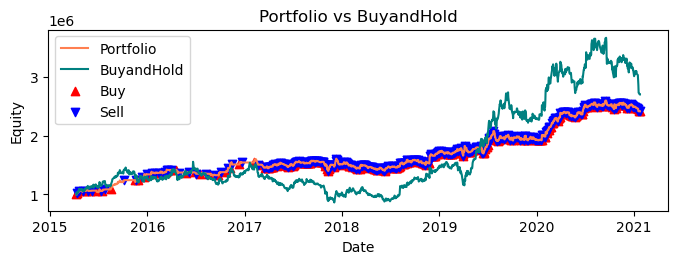

<Figure size 640x480 with 0 Axes>

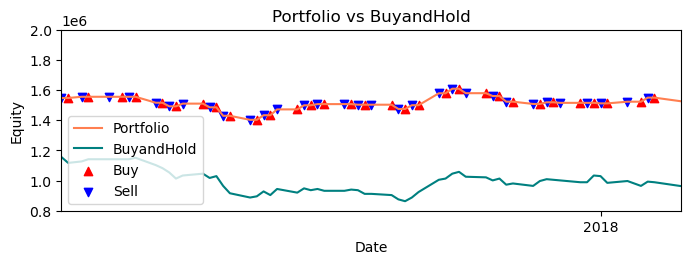

MDD(%):  0.12723465328378877
Buy and Hold 대비 return(%):  -10.624092879312732


In [193]:
UT(df)

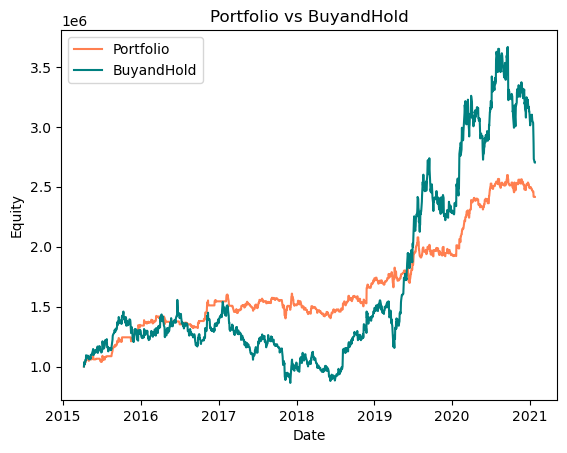

In [117]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Date'] = pd.to_datetime(df['Date'])

# 년도 컬럼 추가
df['Year'] = df['Date'].dt.year

# 그래프 그리기
plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Portfolio vs BuyandHold')
plt.legend()

# x 축 눈금 간격 조정
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

# 날짜 형식 변경
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

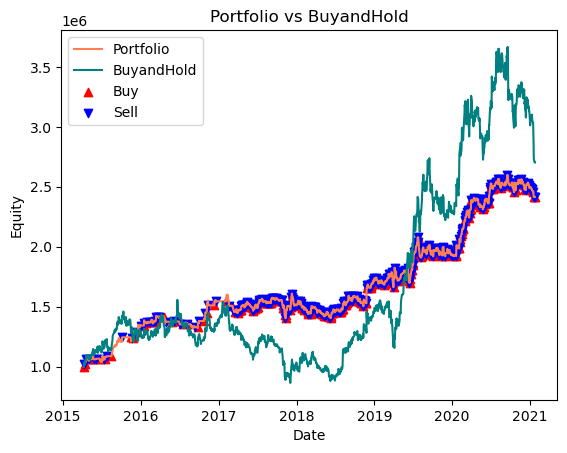

In [118]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Date'] = pd.to_datetime(df['Date'])

# 년도 컬럼 추가
df['Year'] = df['Date'].dt.year

# 그래프 그리기
plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')

plt.scatter(df['Date'][df['sell_buy'] == 1], df['portfolio'][df['sell_buy'] == 1], marker='^', color='red', label='Buy')
plt.scatter(df['Date'][df['sell_buy'] == -1], df['portfolio'][df['sell_buy'] == -1], marker='v', color='blue', label='Sell')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Portfolio vs BuyandHold')
plt.legend()

# x 축 눈금 간격 조정
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

# 날짜 형식 변경
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

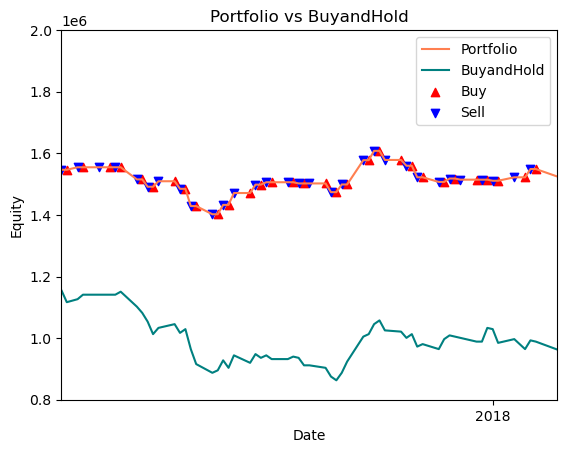

In [119]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Date'] = pd.to_datetime(df['Date'])

# 년도 컬럼 추가
df['Year'] = df['Date'].dt.year

# 그래프 그리기
plt.plot(df['Date'], df['portfolio'], label='Portfolio', color='Coral')
plt.plot(df['Date'], df['buy_and_hold'], label='BuyandHold', color='Teal')

plt.scatter(df['Date'][df['sell_buy'] == 1], df['portfolio'][df['sell_buy'] == 1], marker='^', color='red', label='Buy')
plt.scatter(df['Date'][df['sell_buy'] == -1], df['portfolio'][df['sell_buy'] == -1], marker='v', color='blue', label='Sell')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Portfolio vs BuyandHold')
plt.legend()

# x 축 눈금 간격 조정
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365))  # 1년 간격

# 날짜 형식 변경
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)

# 확대 기능 추가 (원하는 날짜 범위로 설정)
plt.xlim(pd.Timestamp('2018-10-01'), pd.Timestamp('2019-01-01'))  # x 축 범위 설정
plt.ylim(0.8e6, 2.0e6)

plt.show()

In [120]:
df

,Unnamed: 0,pred_Trend,Date,Marketcap,Trend,portfolio,sell_buy,buy_and_hold,Year
0,0,-1.021823,2016-03-28,2.033797e+13,-0.873016,1.000000e+06,1,1.000000e+06,2016
1,1,-0.866249,2016-03-29,2.109611e+13,-0.841270,1.022366e+06,0,1.037277e+06,2016
2,2,0.528971,2016-03-30,2.099723e+13,-0.809524,1.019449e+06,-1,1.032415e+06,2016
3,3,2.174911,2016-03-31,2.099723e+13,-0.777778,1.019449e+06,0,1.032415e+06,2016
4,4,-0.866210,2016-04-01,2.070056e+13,-0.746032,1.019449e+06,1,1.017828e+06,2016
...,...,...,...,...,...,...,...,...,...
1421,1421,12.636087,2022-01-05,5.823743e+13,0.000000,2.417222e+06,-1,2.863482e+06,2022
1422,1422,-7.600556,2022-01-06,5.553062e+13,0.000000,2.417222e+06,1,2.730391e+06,2022
1423,1423,12.645076,2022-01-07,5.544859e+13,0.000000,2.415079e+06,-1,2.726358e+06,2022
1424,1424,-7.573018,2022-01-10,5.495644e+13,0.000000,2.415079e+06,1,2.702159e+06,2022
